In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import pymc3 as pm
from os.path import join, isfile
from os import listdir
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import glambox as gb

# Example 3: Parameter Recovery

When performing model-based analyses of behaviour that include the interpretation of parameter estimates, or comparisons of parameter estimates between groups or conditions, the researcher should be confident that the model's parameters are actually identifiable. In particular, the researcher needs to be confident that the set of estimated parameters unambiguously describes the observed data better than any other set of parameters. A straightforward way of testing this is to perform a parameter recovery: The general intuition of a parameter recovery analysis is to first generate a synthetic dataset from a model using a set of known parameters, and then fitting the model to the synthetic data. Finally, the estimated parameters can be compared to the known generating parameters. If they match to a satisfying degree, the parameters were recovered successfully. Previous analyses have already indicated that the GLAM's parameters can be recovered to a satisfying degree (Thomas et al., 2019). Yet, the ability to identify a given set of parameters always depends on the specific features of a given dataset. The most obvious feature of a dataset that influences recoverability of model parameters is the number of data points included. Usually this quantity refers to the number of trials that participants performed. For hierarchical models, the precision of group-level estimates also depends on the number of individuals per group. Additional features that vary between datasets and that could influence parameter estimation are the observed distribution of gaze, the distribution of item values or the number of items in each trial. For this reason, it is recommended to test whether the estimated parameters of a model can be recovered in the context of a specific dataset.

## 1. Simulating "observed data"

In [2]:
np.random.seed(2)
# Simulate a pretend-to-be-collected dataset.
# In the real world, this dataset is collected from participants, so we do not know
# 1) if GLAM is an adequate model for the data
# 2) data-generating parameters

data_model = gb.GLAM()

parameters = dict(v=dict(mu=0.6, sd=0.25, bounds=(0, 1.5)),
                  gamma=dict(mu=0.1, sd=0.4, bounds=(-1, 1)),
                  s=dict(mu=0.25, sd=0.05, bounds=(0.05, 0.75)),
                  tau=dict(mu=1.0, sd=0.3, bounds=(0.1, 2)))

data_model.simulate_group(kind='hierarchical',
                          n_individuals=50,
                          n_trials=200,
                          n_items=3,
                          parameters=parameters,
                          value_range=(1, 10),
                          seed=1)

data = data_model.data

In [3]:
# Save data to file
data.to_csv(join('examples', 'example_3', 'data', 'data.csv'), index=False)

## 2. Parameter estimation

To demonstrate the procedure of a basic parameter recovery analysis using GLAMbox, suppose we have collected and loaded a dataset called `data`. In the first step, we perform parameter estimation as in the previous examples:

In [4]:
np.random.seed(4)
glam = gb.GLAM(data=data)
glam.make_model(kind='individual')
glam.fit(method='MCMC',
         draws=5000,
         tune=5000,
         chains=4)

Generating single subject models for 50 subjects...
Fitting 50 model(s) using MCMC...
  Fitting model 1 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1521.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 2 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1524.93draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 3 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1497.70draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 4 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1511.16draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 5 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1501.70draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 6 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1514.69draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 7 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1491.05draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 8 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1410.74draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 9 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1392.67draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 10 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.04draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 11 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1351.10draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 12 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1370.28draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 13 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1377.46draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 14 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1393.44draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 15 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1401.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 16 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1399.85draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 17 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1408.19draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 18 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1398.78draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 19 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1361.44draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 20 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1362.91draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 21 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.11draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 22 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1384.00draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 23 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1400.72draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 24 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1402.05draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 25 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1392.94draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 26 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1375.53draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 27 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.66draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 28 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1356.26draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 29 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1341.15draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 30 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1368.07draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 31 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1405.53draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 32 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.60draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 33 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1395.50draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 34 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1396.33draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 35 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1407.29draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 36 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1419.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 37 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.48draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 38 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.26draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 39 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1379.49draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 40 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.70draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 41 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.24draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 42 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1376.37draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 43 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1355.17draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 44 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1356.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 45 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1370.10draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 46 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1375.94draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 47 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1372.76draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 48 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1369.91draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 49 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1374.97draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 50 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.66draws/s]
The number of effective samples is smaller than 10% for some parameters.


/!\ Automatically setting parameter precision...


## 3. Simulation of synthetic data

The next step is to create a synthetic, model-generated dataset using the model parameters estimated from the empirical data, together with the empirically observed stimulus and gaze data using the `predict` method. Setting `n_repeats` to 1 results in a dataset of the same size as the observed one:

In [5]:
np.random.seed(5)
glam.predict(n_repeats=1)
synthetic = glam.prediction

  0%|          | 8/10000 [00:00<02:15, 73.54it/s]

Generating predictions for 10000 trials (1 repeats each)...


100%|██████████| 10000/10000 [02:15<00:00, 73.65it/s]


In [6]:
# save synthetic data to file
synthetic.to_csv(join('examples', 'example_3', 'data', 'synthetic.csv'), index=False)

In [7]:
# For this synthetic dataset, we know the generating parameters:
true_parameters = {parameter: glam.estimates[parameter].values
                   for parameter in ['v', 'gamma', 's', 'tau']}

# Save these generating parameters
true_param_df = pd.DataFrame(true_parameters)
true_param_df['subject'] = range(50)
true_param_df.to_csv(join('examples', 'example_3', 'results', 'true_parameters.csv'), index=False)

The synthetic dataset should resemble the empirically observed data closely. If there are major discrepancies between the synthetic and observed data, this indicates that GLAM might not be a good candidate model for the data at hand.

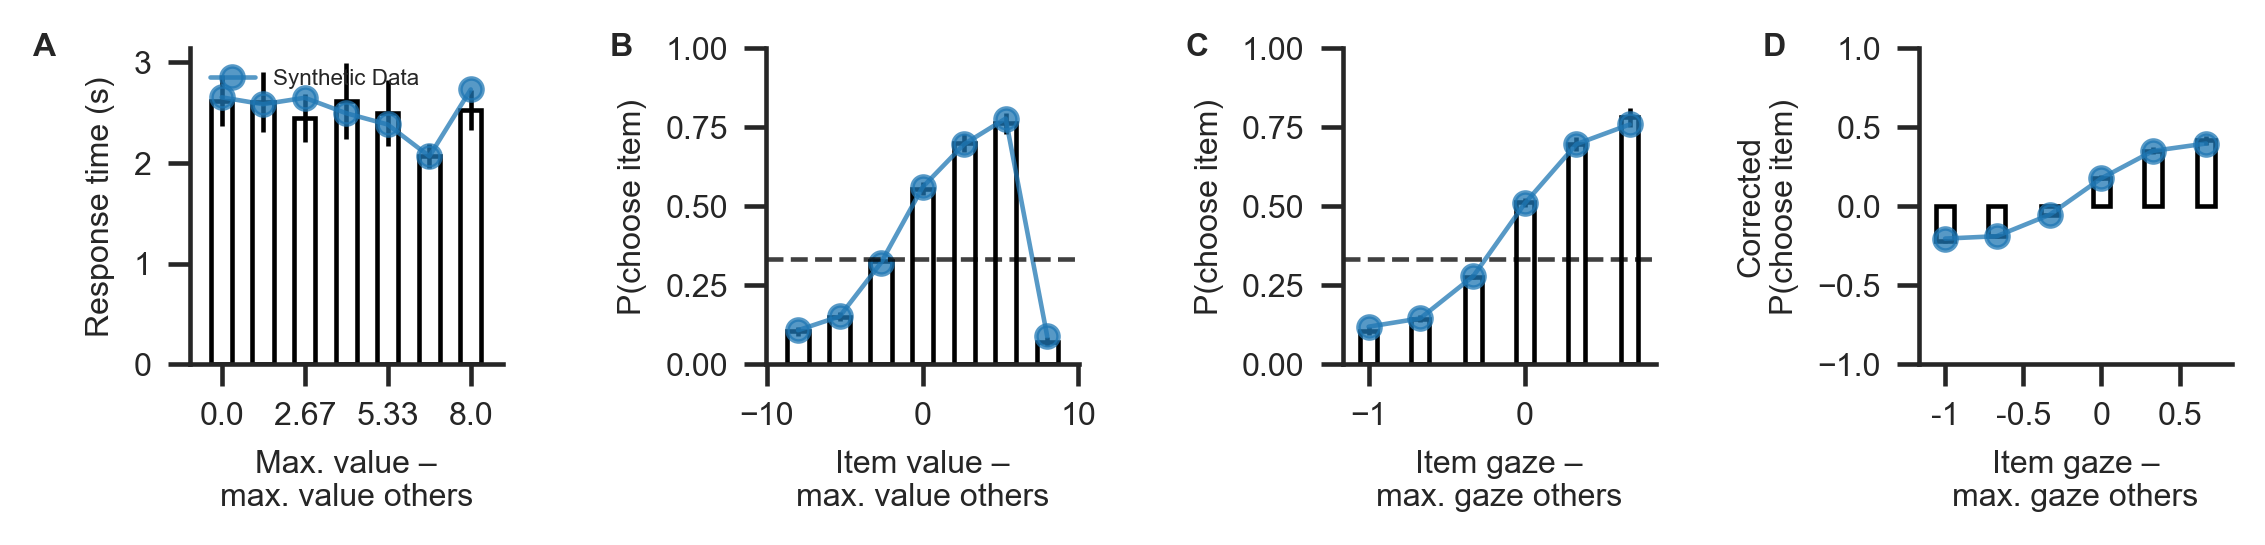

In [8]:
# visualize match between "observed" and synthetic datasets
gb.plots.plot_behaviour_aggregate(data, line_data=[synthetic], line_labels=['Synthetic Data'])
plt.savefig(join('examples', 'example_3', 'figures', 'data-vs-synthetic.png'), dpi=330)

## 4. Parameter re-estimation

Next, we create a new model instance, attach the synthetic data, build a model and re-estimate its parameters:

In [9]:
np.random.seed(9)
glam_rec = gb.GLAM(data=synthetic)
glam_rec.make_model(kind='individual')
glam_rec.fit(method='MCMC',
             draws=5000,
             tune=5000,
             chains=4)

Generating single subject models for 50 subjects...
Fitting 50 model(s) using MCMC...
  Fitting model 1 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.82draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 2 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1482.00draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 3 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1512.29draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 4 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1512.15draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 5 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1516.62draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 6 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1512.37draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 7 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1499.76draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 8 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1509.19draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 9 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1519.25draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 10 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1512.80draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 11 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1501.04draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 12 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1517.62draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 13 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1519.65draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 14 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1500.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 15 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1503.79draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 16 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1513.04draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 17 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1513.31draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 18 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1498.32draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 19 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1508.80draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 20 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1516.35draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 21 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1508.15draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 22 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1494.98draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 23 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1506.00draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 24 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1516.12draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 25 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1500.68draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 26 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1495.98draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 27 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1505.32draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 28 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1519.75draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 29 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1498.66draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 30 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1506.96draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 31 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1517.02draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 32 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1506.41draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 33 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1507.68draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 34 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1502.52draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 35 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1501.91draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 36 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1502.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 37 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1498.02draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 38 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1499.24draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 39 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1505.96draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 40 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1501.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 41 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1500.00draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 42 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1504.51draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 43 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1506.77draws/s]
The number of effective samples is smaller than 25% for some parameters.


  Fitting model 44 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1510.37draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 45 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1488.82draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 46 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1518.79draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 47 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1514.12draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 48 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1517.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 49 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1504.49draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 50 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:26<00:00, 1510.27draws/s]
The number of effective samples is smaller than 25% for some parameters.


/!\ Automatically setting parameter precision...


In [10]:
# save recovered estimates to file
glam_rec.estimates.to_csv(join('examples', 'example_3', 'results', 'glam_rec_estimates.csv'), index=False)

## 5. Comparison of generating and recovered estimates

Finally, the recovered and generating parameters can be compared. If the recovered parameters do not match the generating parameters, the parameters cannot be identified given this specific dataset. In this case, parameter estimates should not be interpreted.

If, on the other hand, generating and recovered parameters do align, the parameters have been recovered successfully. This indicates that the model's parameters can be identified unambiguously given the general characteristics of the dataset and thereby increases confidence that the parameters obtained from the empirical data are valid and can be interpreted.

In [12]:
def plot_recovery_individual(model, generating_parameters,
                             parameters=['v', 'gamma', 's', 'tau'],
                             xlimits=dict(v=[-0.1, 0.1],
                                          gamma=[-0.25, 0.25],
                                          s=[-0.075, 0.075],
                                          tau=[-1, 1]),
                             figsize=gb.plots._plots_internal.cm2inch(18, 6),
                             fontsize=7):
    """
    Plot parameter recovery results from individually fitted models.
    
    Args:
        model: Fitted GLAM model of type 'individual'
        generating_parameters (dict): Dictionary of data generating parameters
        parameters (list, optional): List of parameters to include
        figsize (tuple, optional): Figure size
    
    
    """
    parameter_names = {'v': 'v',
                       'gamma': r'$\gamma$',
                       's': r'$\sigma$',
                       'tau': r'$\tau$'}

    n_individuals = len(generating_parameters[parameters[0]])
    n_parameters = len(parameters)

    # Construct long dataframe, 
    # every row is one parameter of one subject
    recovery = []
    for parameter in parameters:
        recovery_p = model.estimates[['subject', parameter, parameter + '_hpd_2.5', parameter + '_hpd_97.5']].copy()
        recovery_p.rename({parameter: 'recovered',
                           parameter + '_hpd_2.5': 'recovered_hpd_lower',
                           parameter + '_hpd_97.5': 'recovered_hpd_upper'},
                          axis=1, inplace=True)
        recovery_p['parameter'] = parameter
        recovery_p['generating'] = generating_parameters[parameter]
        recovery.append(recovery_p)
    recovery = pd.concat(recovery)
    recovery['success'] = ((recovery['generating'] > recovery['recovered_hpd_lower']) &
                           (recovery['generating'] < recovery['recovered_hpd_upper'])).values

    # Plot
    fig = plt.figure(figsize=figsize, dpi=330)
    axs = {}
    for p, parameter in enumerate(parameters):
        axs[(0, p)] = plt.subplot2grid((5, 4), (0, p), rowspan=1)
        axs[(1, p)] = plt.subplot2grid((5, 4), (2, p), rowspan=4, sharex=axs[(0, p)])

    for p, parameter in enumerate(parameters):
        parameter_df = recovery.loc[recovery['parameter'] == parameter]
    
        # Histogram of differences
        delta = (parameter_df['recovered'] - parameter_df['generating']).values
        axs[(0, p)].hist(delta,
                         color='black', alpha=0.3,
                         bins=np.linspace(*xlimits[parameter], 21))
        axs[(0, p)].axvline(0,
                            color='black', linewidth=0.5, alpha=0.7)
        axs[(0, p)].set_ylabel('Freq.',
                               fontsize=fontsize)
        for label in axs[(0, p)].get_xticklabels():
            label.set_visible(False)
    
        # Individual HPDs around true value
        ## Success Color coding
        color = np.array(['red', 'green'])[parameter_df['success'].values.astype(int)]
        
        ## Vertical, indicating zero difference
        axs[(1, p)].axvline(0, color='black', zorder=-1, linewidth=0.5, alpha=0.7)
        ## Difference posterior mean - generating
        axs[(1, p)].scatter(x=delta,
                   y=range(n_individuals),
                   color=color,
                   s=4,
                   marker='o', facecolor='white',
                   zorder=2)
        ## HPD        
        axs[(1, p)].hlines(y=range(n_individuals),
                           xmin=parameter_df['recovered_hpd_lower'].values - parameter_df['generating'].values,
                           xmax=parameter_df['recovered_hpd_upper'].values - parameter_df['generating'].values,
                           linewidth=0.5,
                           zorder=1,
                           color=color)

        ## Labels
        axs[(1, p)].set_xlabel(r'$\Delta$' + parameter_names[parameter], 
                      fontsize=fontsize)
        axs[(1, p)].set_ylabel('Participant',
                      fontsize=fontsize)
                
        ## Limits
        axs[(1, p)].set_xlim(*xlimits[parameter])

        ## Panel Labels
        from string import ascii_uppercase
        for label, ax in zip(list(ascii_uppercase),
                             [axs[i, p]
                              for i in [0, 1]
                              for p in range(len(parameters))]):
            ax.tick_params(axis='both', which='major', labelsize=fontsize)
            ax.text(-0.3, 1.05, label, transform=ax.transAxes,
                    fontsize=fontsize, fontweight='bold', va='top')
        sns.despine()
        fig.tight_layout(h_pad=-1)
        
        for ax in [axs[(1, p)]
                      for p in range(len(parameters))]:
            ax.set_yticks([])

    return fig, axs

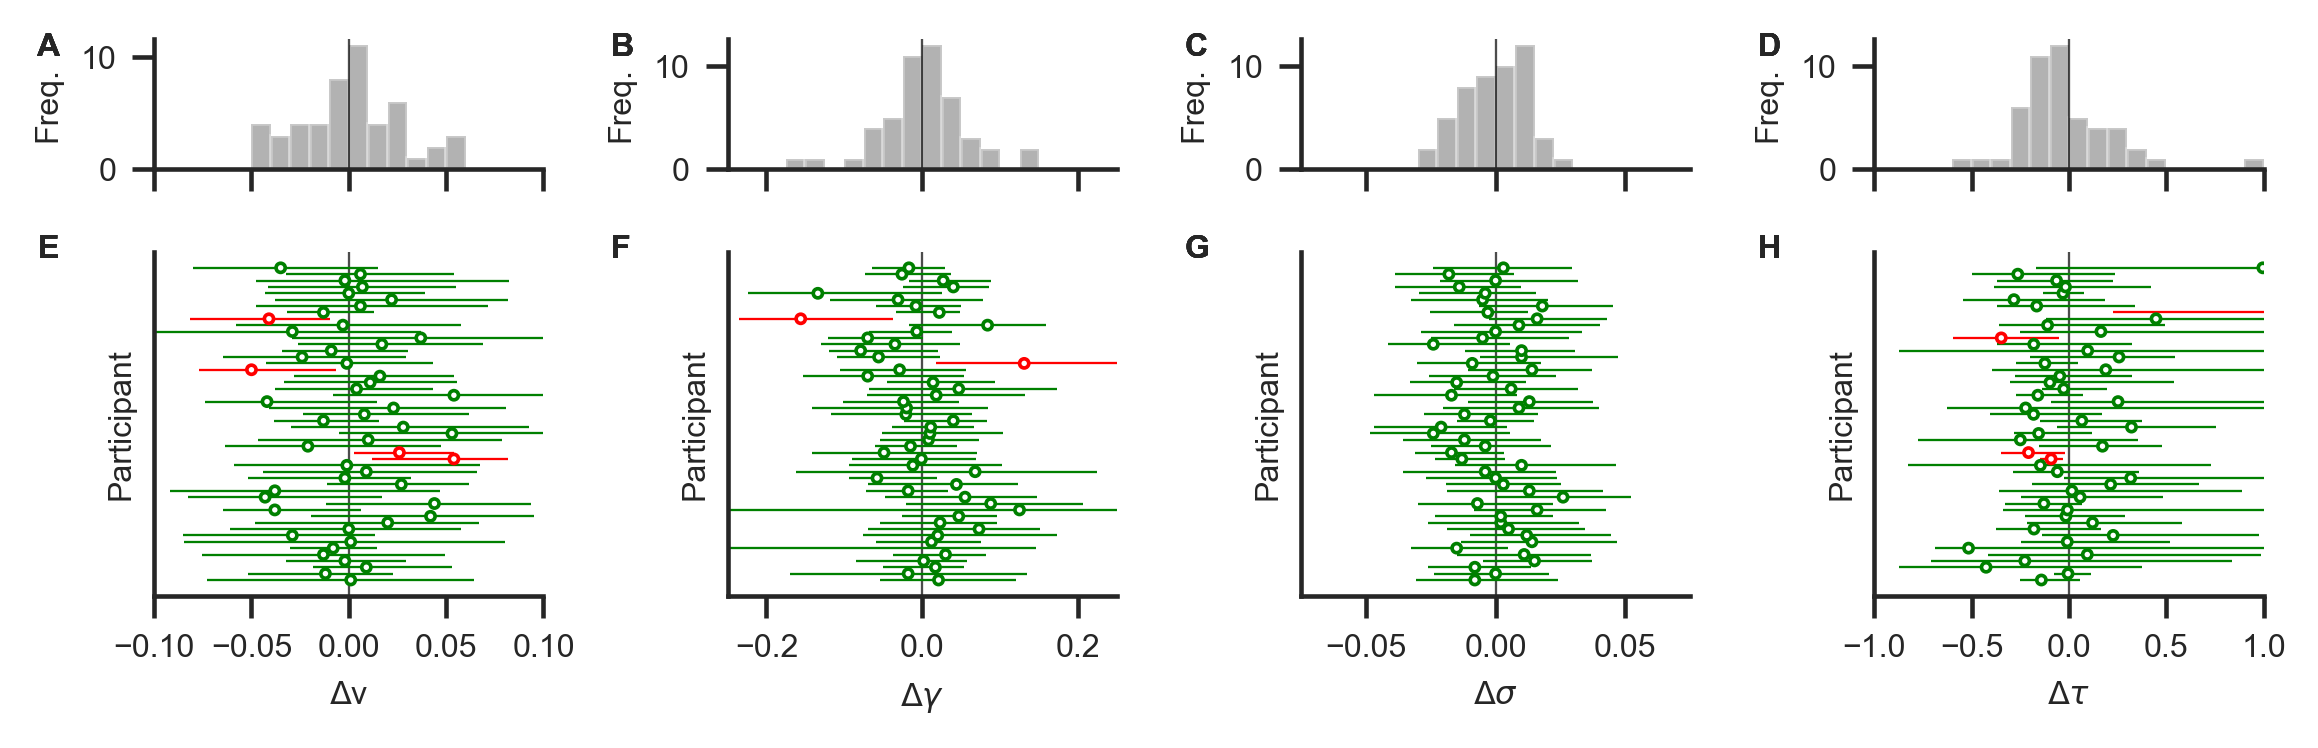

In [13]:
fig, axs = plot_recovery_individual(glam_rec, true_parameters);
plt.savefig(join('examples', 'example_3', 'figures', 'deltaGenRec.png'), dpi=330)

The lower row (**E-H**) shows deviations between known generating parameter values and recovered MAP estimates (circles) and their 95\% HPDs (horizontal error bars) for each participant. Green (red) colour indicates that the true value is within (outside) the 95\% HPD. Most parameters were recovered with small deviations. Panels **A-D** show distributions of deviations across individuals. Distributions are mostly centered around zero, indicating no systematic under- or overestimation (bias) across individuals.

Here, all parameters could be recovered as illustrated in the figure. For most individuals, the MAP estimates and their 95\% HPDs are close to the known generating parameters. Across individuals, no systematic biases in the estimation can be identified. 

## 6. Conclusion

In this example, we demonstrated how to perform a basic parameter recovery for a given dataset. When successful, this increases confidence that the parameters can be identified with the given dataset.

## 7. References

- Thomas, A. W., Molter, F., Krajbich, I., Heekeren, H. R., & Mohr, P. N. (2019). Gaze bias differences capture individual choice behaviour. Nature human behaviour, 3(6), 625. ([Link to publisher](https://www.nature.com/articles/s41562-019-0584-8))